In [1]:
import os
os.getcwd()
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is c:\Users\blond\Documents\NssProjects\sleigh_the_model


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scripts.features as ft 

In [5]:
data = pd.read_csv('data/dataformodel.csv')
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.head()

,date,pce,inflation,unemployment_rate,revolving_credit,nonrevolving_credit,total_credit
0,1959-01-01,306.1,29.01,6.0,NaN,48961.16,48961.16
1,1959-02-01,309.6,29.00,5.9,NaN,49513.71,49513.71
2,1959-03-01,312.7,28.97,5.6,NaN,50007.73,50007.73
3,1959-04-01,312.2,28.98,5.2,NaN,50463.43,50463.43
4,1959-05-01,316.1,29.04,5.1,NaN,51007.24,51007.24


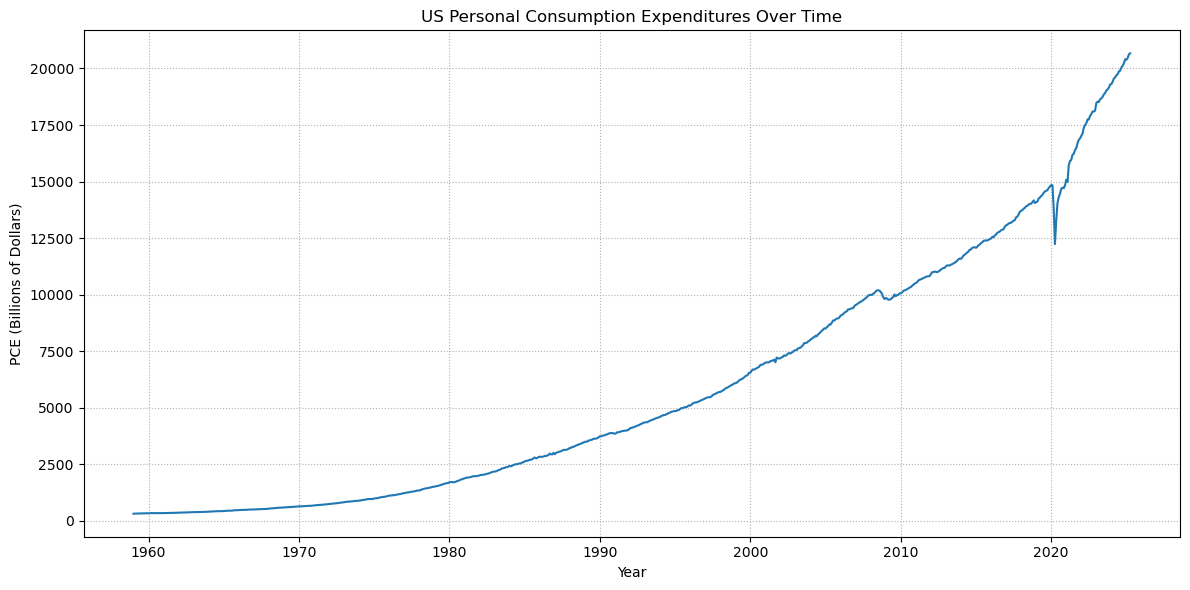

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['pce'], label='Personal Consumption Expenditures')
plt.title('US Personal Consumption Expenditures Over Time')
plt.xlabel('Year')
plt.ylabel('PCE (Billions of Dollars)')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig("visuals/pce_hist.png", dpi=300)
plt.show()

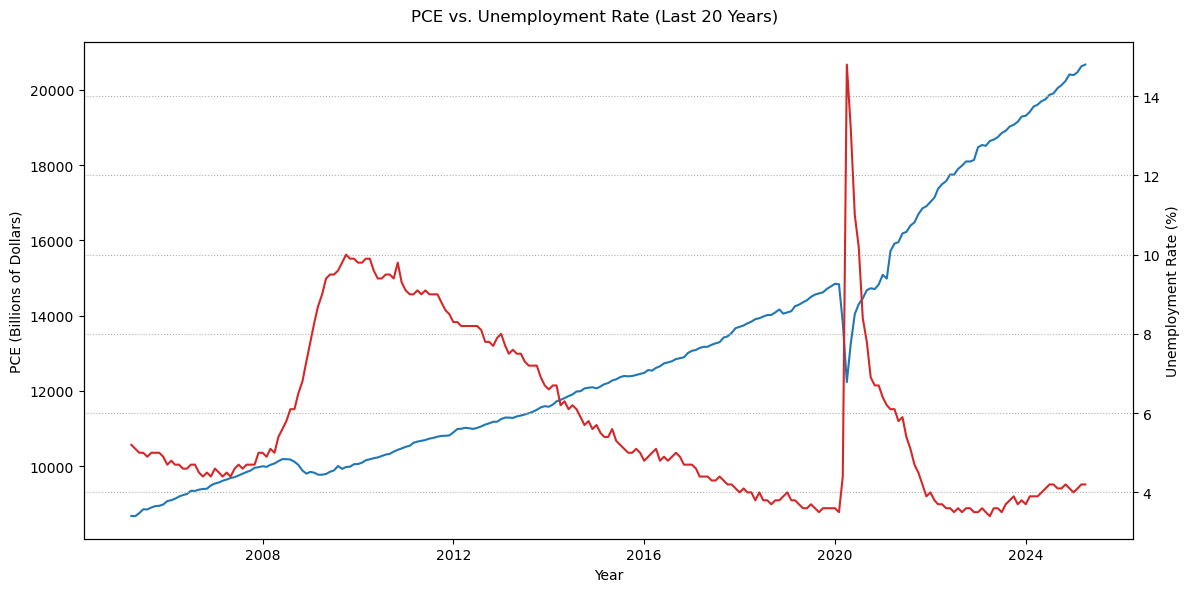

In [8]:
latest_date = data['date'].max()
start_date = latest_date - pd.DateOffset(years=20)

data_last_20y = data[data['date'] >= start_date]

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('PCE (Billions of Dollars)')
ax1.plot(data_last_20y['date'], data_last_20y['pce'], color=color, label='PCE')
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)')
ax2.plot(data_last_20y['date'], data_last_20y['unemployment_rate'], color=color, label='Unemployment Rate')
ax2.tick_params(axis='y')

fig.suptitle('PCE vs. Unemployment Rate (Last 20 Years)')
fig.tight_layout() 
plt.grid(True, linestyle=':')
plt.savefig("visuals/pce_unemp.png", dpi=300)
plt.show()

In [17]:
features_to_lag = [
    'pce',
    'inflation',
    'unemployment_rate',
    'total_credit',
    'revolving_credit',
    'nonrevolving_credit'
]

In [18]:
file = 'data/dataformodel.csv'
months_in_adv = 12 
data = ft.load_data(file, months_in_adv)
data_with_lag = ft.add_lag_features(data, months_in_adv, features_to_lag )
data_with_lag = data_with_lag.dropna()

In [19]:
data_with_lag.head()

,date,pce,inflation,unemployment_rate,revolving_credit,nonrevolving_credit,total_credit,pce_future,pce_lag_1,pce_lag_2,...,nonrevolving_credit_lag_3,nonrevolving_credit_lag_4,nonrevolving_credit_lag_5,nonrevolving_credit_lag_6,nonrevolving_credit_lag_7,nonrevolving_credit_lag_8,nonrevolving_credit_lag_9,nonrevolving_credit_lag_10,nonrevolving_credit_lag_11,nonrevolving_credit_lag_12
12,1960-01-01,323.6,29.37,5.2,0.0,56015.58,56015.58,332.2,322.9,322.9,...,54365.95,53683.75,53038.53,52356.85,51675.44,51007.24,50463.43,50007.73,49513.71,48961.16
13,1960-02-01,325.3,29.41,4.8,0.0,56364.63,56364.63,333.7,323.6,322.9,...,54794.81,54365.95,53683.75,53038.53,52356.85,51675.44,51007.24,50463.43,50007.73,49513.71
14,1960-03-01,330.2,29.41,5.4,0.0,56862.88,56862.88,337.7,325.3,323.6,...,56010.68,54794.81,54365.95,53683.75,53038.53,52356.85,51675.44,51007.24,50463.43,50007.73
15,1960-04-01,336.5,29.54,5.2,0.0,57711.40,57711.40,337.6,330.2,325.3,...,56015.58,56010.68,54794.81,54365.95,53683.75,53038.53,52356.85,51675.44,51007.24,50463.43
16,1960-05-01,330.0,29.57,5.1,0.0,57951.03,57951.03,339.9,336.5,330.2,...,56364.63,56015.58,56010.68,54794.81,54365.95,53683.75,53038.53,52356.85,51675.44,51007.24


In [20]:
data_with_lag = ft.add_lag_features(data, months_lag, features_to_lag)

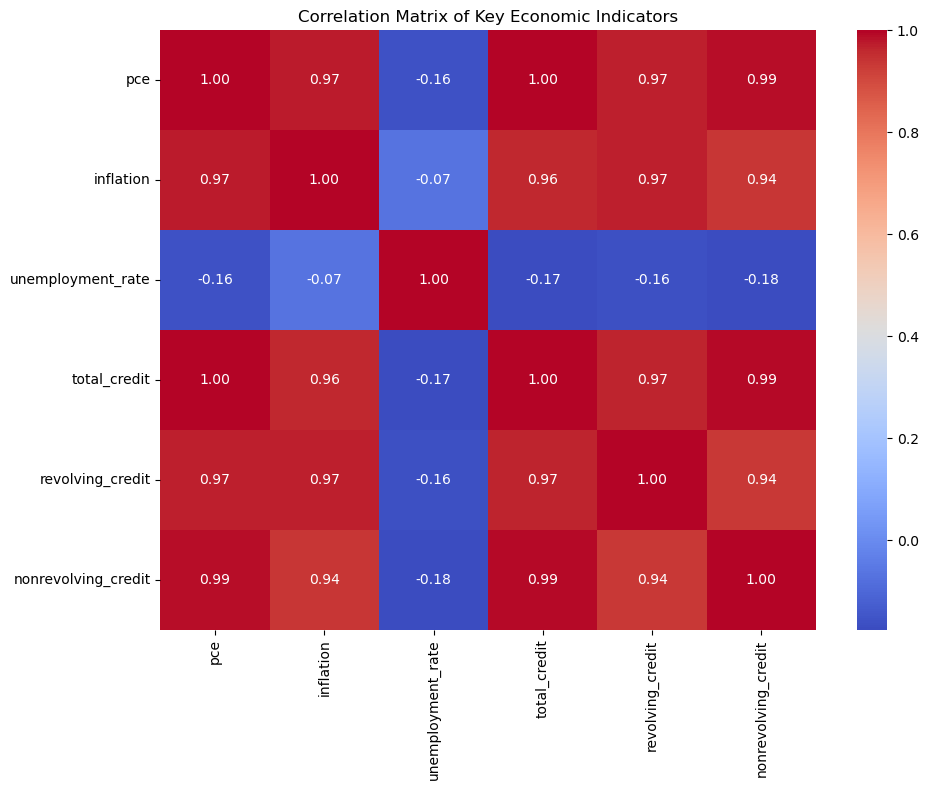

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[features_to_lag].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Economic Indicators')
plt.tight_layout()
plt.savefig("visuals/correlation_heatmap.png", dpi=300)
plt.show()

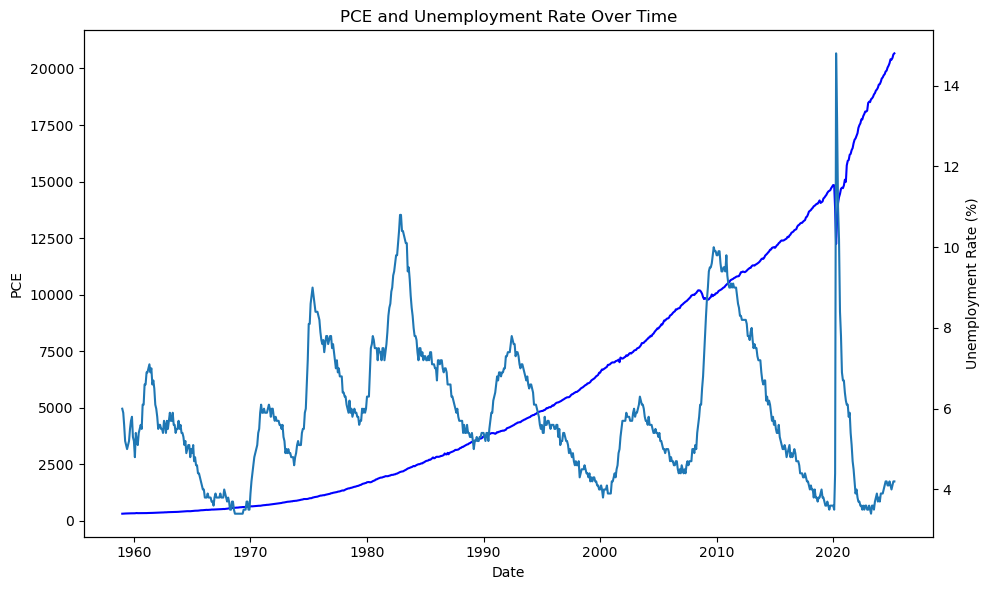

In [28]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('PCE')
ax1.plot(data['date'], data['pce'], label='PCE', color='blue')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Rate (%)')
ax2.plot(data['date'], data['unemployment_rate'], label='Unemployment Rate')
ax2.tick_params(axis='y')

plt.title('PCE and Unemployment Rate Over Time')
fig.tight_layout()
plt.savefig("pce_unemployment_trend.png", dpi=300)
plt.show()

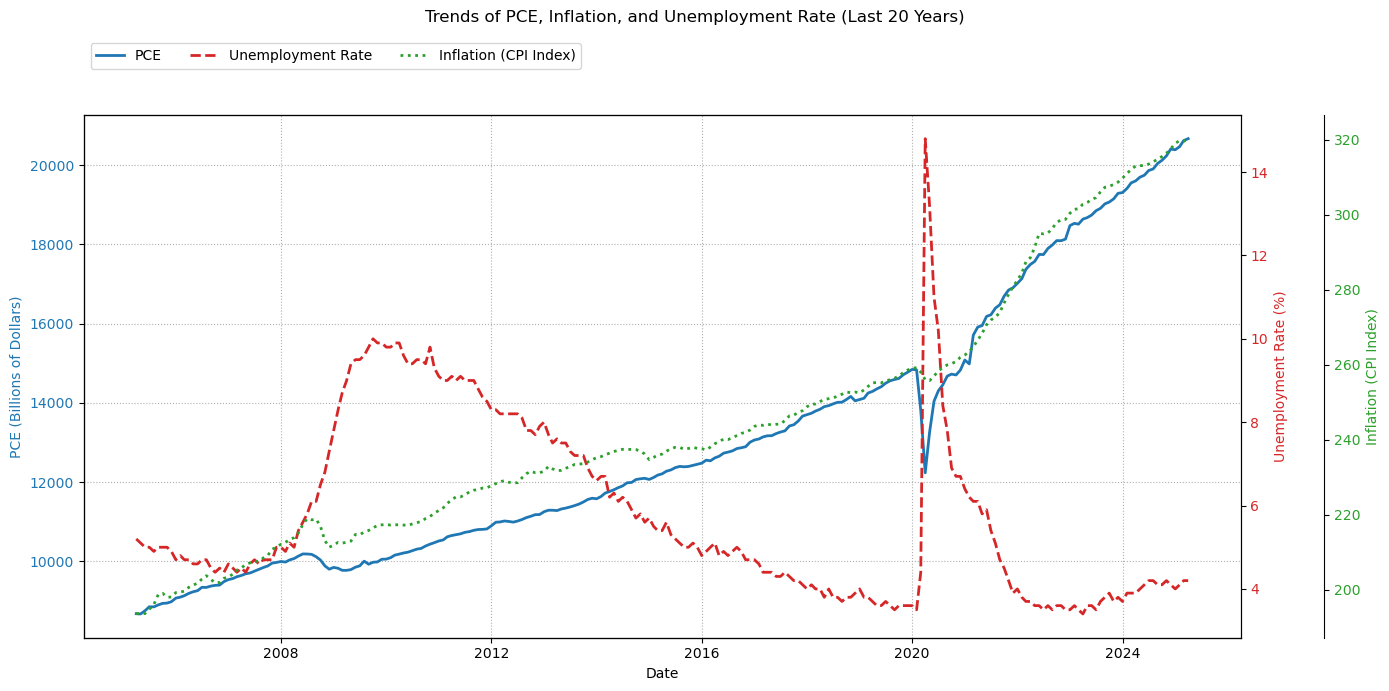

In [29]:
data = pd.read_csv('data/dataformodel.csv')
data['date'] = pd.to_datetime(data['date'])

latest_date = data['date'].max()
start_date = latest_date - pd.DateOffset(years=20)
data_last_20y = data[data['date'] >= start_date].copy()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('PCE (Billions of Dollars)', color=color)
ax1.plot(data_last_20y['date'], data_last_20y['pce'], color=color, label='PCE', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle=':')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(data_last_20y['date'], data_last_20y['unemployment_rate'], color=color, label='Unemployment Rate', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color = 'tab:green'
ax3.set_ylabel('Inflation (CPI Index)', color=color)
ax3.plot(data_last_20y['date'], data_last_20y['inflation'], color=color, label='Inflation (CPI Index)', linestyle=':', linewidth=2)
ax3.tick_params(axis='y', labelcolor=color)

fig.suptitle('Trends of PCE, Inflation, and Unemployment Rate (Last 20 Years)')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', bbox_to_anchor=(0.0, 1.15), ncol=3)

fig.tight_layout() 
plt.savefig("visuals/pce_unemp_inf.png", dpi=300)
plt.show()
